In [ ]:
building_meta.csv
site_id - Foreign key for the weather files.
building_id - Foreign key for training.csv
primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
square_feet - Gross floor area of the building
year_built - Year building was opened
floor_count - Number of floors of the building

In [ ]:
weather_[train/test].csv
Weather data from a meteorological station as close as possible to the site.

site_id
air_temperature - Degrees Celsius
cloud_coverage - Portion of the sky covered in clouds, in oktas
dew_temperature - Degrees Celsius
precip_depth_1_hr - Millimeters
sea_level_pressure - Millibar/hectopascals
wind_direction - Compass direction (0-360)
wind_speed - Meters per second

In [109]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns

In [209]:
from matplotlib import pyplot as plt
import plotly.express as px
#from statsmodels.tsa.arima.model import ARIMA

In [96]:
train_data=pd.read_csv('train.csv')

In [255]:
train_data

,building_id,meter,timestamp,meter_reading,hour,month,meter_reading_log,week,is_weekday
0,0,0,2016-01-01 00:00:00,0.000,0,1,0.000000,53,True
1,1,0,2016-01-01 00:00:00,0.000,0,1,0.000000,53,True
2,2,0,2016-01-01 00:00:00,0.000,0,1,0.000000,53,True
3,3,0,2016-01-01 00:00:00,0.000,0,1,0.000000,53,True
4,4,0,2016-01-01 00:00:00,0.000,0,1,0.000000,53,True
...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,23,12,2.277267,52,False
20216096,1445,0,2016-12-31 23:00:00,4.825,23,12,1.762159,52,False
20216097,1446,0,2016-12-31 23:00:00,0.000,23,12,0.000000,52,False
20216098,1447,0,2016-12-31 23:00:00,159.575,23,12,5.078761,52,False


In [230]:
train_data.isnull().sum()

building_id          0
meter                0
timestamp            0
meter_reading        0
hour                 0
month                0
meter_reading_log    0
week                 0
dtype: int64

In [5]:
train_data.describe()
#No empty instance

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [7]:
test_data=pd.read_csv('test.csv')

In [8]:
building_metadata=pd.read_csv('building_metadata.csv')

In [19]:
building_metadata

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [163]:
for i in building_metadata['primary_use'].unique():
    print(building_metadata.loc[building_metadata['primary_use'] == i]['primary_use'].value_counts())
         

Education    549
Name: primary_use, dtype: int64
Lodging/residential    147
Name: primary_use, dtype: int64
Office    279
Name: primary_use, dtype: int64
Entertainment/public assembly    184
Name: primary_use, dtype: int64
Other    25
Name: primary_use, dtype: int64
Retail    11
Name: primary_use, dtype: int64
Parking    22
Name: primary_use, dtype: int64
Public services    156
Name: primary_use, dtype: int64
Warehouse/storage    13
Name: primary_use, dtype: int64
Food sales and service    5
Name: primary_use, dtype: int64
Religious worship    3
Name: primary_use, dtype: int64
Healthcare    23
Name: primary_use, dtype: int64
Utility    4
Name: primary_use, dtype: int64
Technology/science    6
Name: primary_use, dtype: int64
Manufacturing/industrial    12
Name: primary_use, dtype: int64
Services    10
Name: primary_use, dtype: int64


In [9]:
building_metadata.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [10]:
sample_submission=pd.read_csv('sample_submission.csv')

In [11]:
sample_submission

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


In [12]:
wheather_train=pd.read_csv('weather_train.csv')

In [13]:
wheather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [214]:
wheather_train['timestamp']=pd.to_datetime(wheather_train['timestamp'])
wheather_train['hour']= np.uint8(wheather_train['timestamp'].dt.hour)

In [215]:
wheather_train.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000,139773.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527,11.504017
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874,6.923170
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000,6.000000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000,12.000000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000,18.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000,23.000000


In [15]:
#Merge Data

In [16]:
building_metadata['building_id'].nunique()

1449

In [17]:
building_metadata.shape

(1449, 6)

In [18]:
building_metadata['site_id'].nunique()

16

In [ ]:
#train_data EDA

In [97]:
train_data['timestamp']=pd.to_datetime(train_data['timestamp'])

In [197]:
train_data['hour']=np.uint8(train_data['timestamp'].dt.hour)

In [195]:
train_data['month']=np.uint8(train_data['timestamp'].dt.month)

In [193]:
train_data['week']=np.uint8(train_data['timestamp'].dt.isocalendar().week)

In [234]:
train_data['is_weekday']=train_data['timestamp'].dt.weekday < 5

In [ ]:
train_data['meter_reading_log']=np.log1p(train_data['meter_reading'])

In [241]:
#Merge site_id, primary_use on merged_data
merged_data=train_data.merge(building_metadata[['site_id','primary_use','building_id']], on='building_id', how='left')

<Axes: xlabel='meter_reading_log', ylabel='Density'>

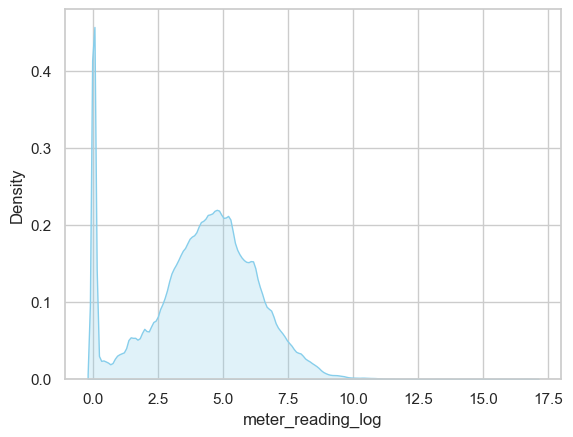

In [260]:
#Meter_reading distribution density graph
sns.set(style="whitegrid")
sns.kdeplot(merged_data['meter_reading_log'], color='skyblue', fill=True)

<Axes: xlabel='hour', ylabel='meter_reading_log'>

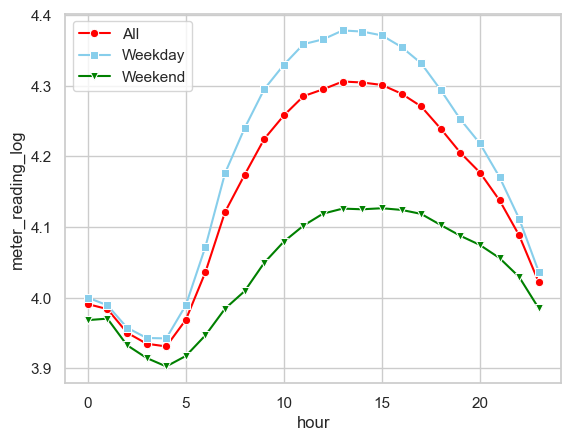

In [278]:
#Meter Reading Hourly Average Graph
hourly_avg = merged_data.groupby('hour')['meter_reading_log'].mean().reset_index()
hourly_avg_weekday = merged_data[merged_data['is_weekday']==True].groupby('hour')['meter_reading_log'].mean().reset_index()
hourly_avg_weekend = merged_data[merged_data['is_weekday']==False].groupby('hour')['meter_reading_log'].mean().reset_index()
sns.lineplot(data=hourly_avg, x='hour', y='meter_reading_log', color='red', label='All', marker='o')
sns.lineplot(data=hourly_avg_weekday, x='hour', y='meter_reading_log', color='skyblue', label='Weekday', marker='s')
sns.lineplot(data=hourly_avg_weekend, x='hour', y='meter_reading_log', color='green', label='Weekend', marker='v')
#sns.lineplot(merged_data['meter_reading_log'].loc[merged_data['is_weekday']==False], color='orange', fill=False)

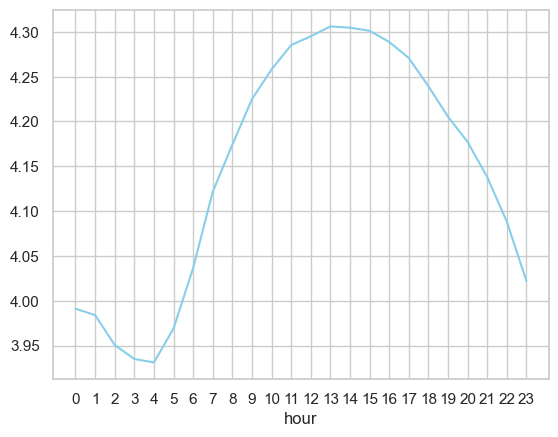

In [169]:
# Mean of log meter_reading of hourpy grouped by data
hour_mean=train_data.groupby('hour')['meter_reading_log'].mean()
hour_mean.plot(kind='line',color='skyblue')
plt.xticks(hour_sum.index)
plt.show()


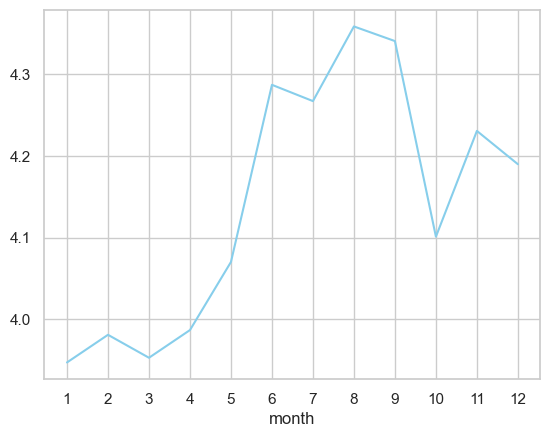

In [171]:
month_mean=train_data.groupby('month')['meter_reading_log'].mean()

month_mean.plot(kind='line',color='skyblue')
plt.xticks(month_mean.index)
plt.show()

In [ ]:
#Merged Data: 

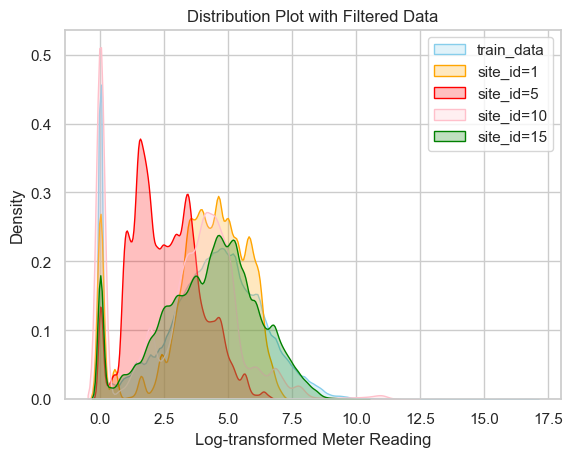

In [232]:
sns.set(style="whitegrid")
filtered_data=merged_data[merged_data['site_id']==1]
sns.kdeplot(train_data['meter_reading_log'], color='skyblue', fill='False', label='train_data')
sns.kdeplot(filtered_data['meter_reading_log'], color='orange', fill='False', label='site_id=1')

sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['site_id']==5], color='red', fill='False', label='site_id=5')
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['site_id']==10], color='pink', fill='False', label='site_id=10')
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['site_id']==15], color='green', fill='False', label='site_id=15')
plt.xlabel('Log-transformed Meter Reading')
plt.ylabel('Density')
plt.title('Distribution Plot with Filtered by site')

plt.legend()
plt.show()


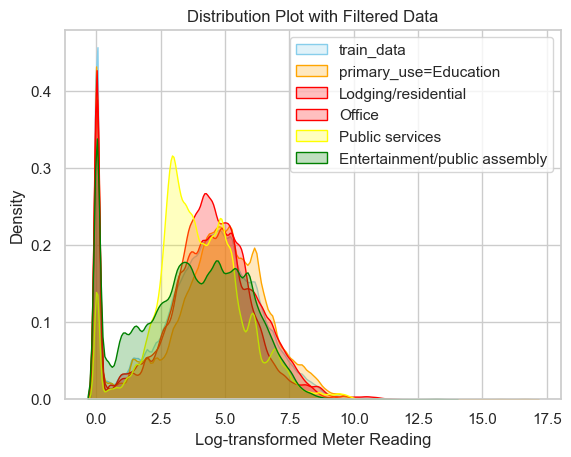

In [233]:
sns.set(style="whitegrid")
filtered_data=merged_data[merged_data['primary_use']=='Education']
sns.kdeplot(train_data['meter_reading_log'], color='skyblue', fill='True', label='train_data')
sns.kdeplot(filtered_data['meter_reading_log'], color='orange', fill='True', label='primary_use=Education')

sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['primary_use']=='Lodging/residential'], color='red', fill='False', label='Lodging/residential')
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['primary_use']=='Office'], color='red', fill='False', label='Office')
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['primary_use']=='Public services'], color='yellow', fill='False', label='Public services')
sns.kdeplot(merged_data['meter_reading_log'].loc[merged_data['primary_use']=='Entertainment/public assembly'], color='green', fill='True', label='Entertainment/public assembly')
plt.xlabel('Log-transformed Meter Reading')
plt.ylabel('Density')
plt.title('Distribution Plot with Filtered by primary_use')

plt.legend()
plt.show()


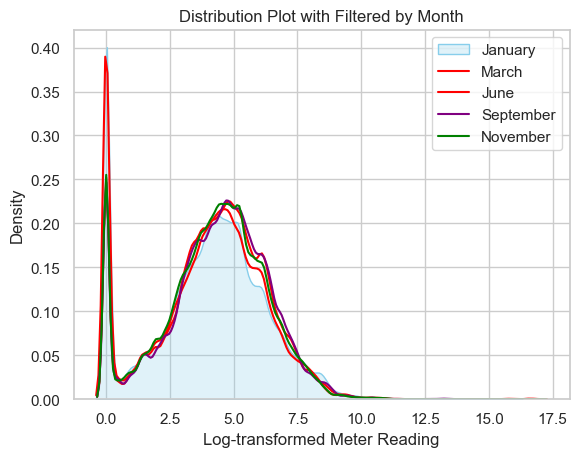

In [254]:
sns.kdeplot((train_data['meter_reading_log'].loc[train_data['month']==1]), color='skyblue', fill=True, label='January')
sns.kdeplot(merged_data['meter_reading_log'].loc[train_data['month']==3], color='red', fill=False, label='March')
sns.kdeplot(merged_data['meter_reading_log'].loc[train_data['month']==6], color='red', fill=False, label='June')
sns.kdeplot(merged_data['meter_reading_log'].loc[train_data['month']==9], color='purple', fill=False, label='September')
sns.kdeplot(merged_data['meter_reading_log'].loc[train_data['month']==11], color='green', fill=False, label='November')
plt.xlabel('Log-transformed Meter Reading')
plt.ylabel('Density')
plt.title('Distribution Plot with Filtered by Month')

plt.legend()
plt.show()

In [303]:
#Hourly Averaged Data Grouped by primary_use
filtered_data=merged_data.groupby(['primary_use','hour'])['meter_reading_log'].mean().reset_index()
fig = px.scatter(filtered_data, x='hour', y='meter_reading_log', color='primary_use')
fig.show()

In [306]:
#Hourly Averaged Data Grouped by primary_use
filtered_data=merged_data.groupby(['primary_use','month'])['meter_reading_log'].mean().reset_index()
fig = px.scatter(filtered_data, x='month', y='meter_reading_log', color='primary_use')
fig.show()

In [305]:
#Meter Reading Hourly Average Graph
hourly_avg_sites = merged_data.groupby(['hour', 'site_id'])['meter_reading_log'].mean().reset_index()
fig = px.scatter(hourly_avg_sites, x='hour', y='meter_reading_log', color='site_id')
fig.show()


In [307]:
#Meter Reading Hourly Average Graph
hourly_avg_sites = merged_data.groupby(['month', 'site_id'])['meter_reading_log'].mean().reset_index()
fig = px.scatter(hourly_avg_sites, x='month', y='meter_reading_log', color='site_id')
fig.show()


In [302]:
filtered_data

,primary_use,hour,meter_reading_log
0,Education,0,4.169604
1,Education,1,4.176243
2,Education,2,4.143606
3,Education,3,4.139833
4,Education,4,4.155922
...,...,...,...
379,Warehouse/storage,19,3.275484
380,Warehouse/storage,20,3.300511
381,Warehouse/storage,21,3.315426
382,Warehouse/storage,22,3.334789


In [124]:
#Comments
#Weekend: many buildings school, work places are closed
#Summer: more air condition

In [165]:
sns.set(style="whitegrid")
sns.countplot(data=train_data, x=train_data['hour'],y=train_data['meter_reading_log'], color='skyblue', fill=True)

ValueError: Cannot pass values for both `x` and `y`

In [ ]:
sns.kdeplot(np.log1p(train_data['meter_reading']), color='skyblue', fill=True)